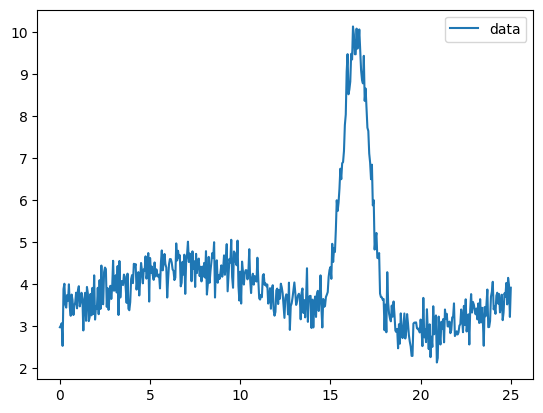

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import SplineModel, GaussianModel

data = np.loadtxt('test_splinepeak.dat')
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, label='data')
plt.legend()

In [23]:
model = GaussianModel(prefix='peak_')
params = model.make_params(amplitude=8, center=16, sigma=1)

In [24]:
knot_xvals = np.array([1, 3, 5, 7, 9, 11, 13, 19, 21, 23, 25])

bkg = SplineModel(prefix='bkg_', xknots=knot_xvals)
params.update(bkg.guess(y, x))

name,value,initial value,min,max,vary,expression
peak_amplitude,8.00000000,8.0,-inf,inf,True,
peak_center,16.0000000,16.0,-inf,inf,True,
peak_sigma,1.00000000,1.0,0.00000000,inf,True,
peak_fwhm,2.35482000,None,-inf,inf,False,2.3548200*peak_sigma
peak_height,3.19153840,None,-inf,inf,False,"0.3989423*peak_amplitude/max(1e-15, peak_sigma)"
bkg_s0,3.78799482,None,-inf,inf,True,
bkg_s1,3.95948665,None,-inf,inf,True,
bkg_s2,4.38400933,None,-inf,inf,True,
bkg_s3,4.43197070,None,-inf,inf,True,
bkg_s4,4.24397598,None,-inf,inf,True,


[[Model]]
    (Model(gaussian, prefix='peak_') + Model(spline_model, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 92
    # data points      = 501
    # variables        = 14
    chi-square         = 52.6611549
    reduced chi-square = 0.10813379
    Akaike info crit   = -1100.61674
    Bayesian info crit = -1041.58425
    R-squared          = 0.94690612
[[Variables]]
    peak_amplitude:  12.2231135 +/- 0.29554108 (2.42%) (init = 8)
    peak_center:     16.4280869 +/- 0.01091051 (0.07%) (init = 16)
    peak_sigma:      0.72096400 +/- 0.01336667 (1.85%) (init = 1)
    peak_fwhm:       1.69774046 +/- 0.03147610 (1.85%) == '2.3548200*peak_sigma'
    peak_height:     6.76360674 +/- 0.09854044 (1.46%) == '0.3989423*peak_amplitude/max(1e-15, peak_sigma)'
    bkg_s0:          3.51175736 +/- 0.04941392 (1.41%) (init = 3.787995)
    bkg_s1:          3.72930068 +/- 0.09558236 (2.56%) (init = 3.959487)
    bkg_s2:          4.26846495 +/- 0.12650286 (

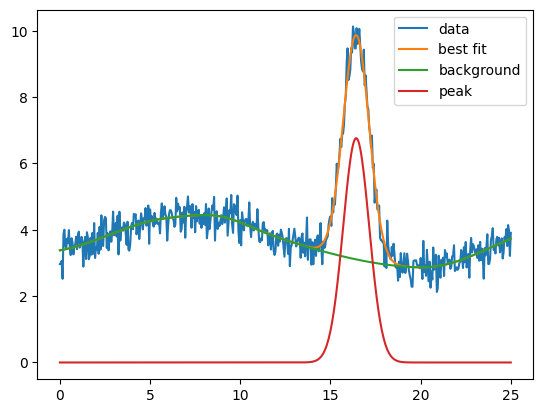

In [25]:
model = model + bkg

params['peak_amplitude'].min = 0
params['peak_center'].min = 10
params['peak_center'].max = 20

out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.3))

plt.plot(x, y, label='data')

comps = out.eval_components()
plt.plot(x, out.best_fit, label='best fit')
plt.plot(x, comps['bkg_'], label='background')
plt.plot(x, comps['peak_'], label='peak')
plt.legend()
plt.show()